In [79]:
pip install --userstatsmodels


Note: you may need to restart the kernel to use updated packages.



Usage:   
  d:\PROGRAMMING\anaconda\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  d:\PROGRAMMING\anaconda\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  d:\PROGRAMMING\anaconda\python.exe -m pip install [options] [-e] <vcs project url> ...
  d:\PROGRAMMING\anaconda\python.exe -m pip install [options] [-e] <local project path> ...
  d:\PROGRAMMING\anaconda\python.exe -m pip install [options] <archive url/path> ...

no such option: --userstatsmodels


In [80]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%config InlineBackend.figure_format = 'retina'


In [81]:
df = pd.read_csv("AMZN.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [82]:
df['Date'] = pd.to_datetime(df['Date'])
max_date = df['Date'].max()
min_date = df['Date'].min()

print(max_date,min_date)

2022-03-24 00:00:00 1997-05-15 00:00:00


In [1]:
start_date_first_set = pd.to_datetime('1997-05-15')
end_date_first_set = pd.to_datetime('2012-05-15')


amazon_first_15_years_1997 = df[(df['Date'] >= start_date_first_set) & (df['Date'] <= end_date_first_set)]
amazon_first_15_years_1997
amazon_first_15_years_1997.set_index('Date', inplace=True)


NameError: name 'pd' is not defined

In [84]:
amazon_first_15_years_1997 = amazon_first_15_years_1997.resample('w').mean()
amazon_first_15_years_1997 = amazon_first_15_years_1997[['Adj Close']]
amazon_first_15_years_1997.head()







,Adj Close
Date,
1997-05-18,1.843750
1997-05-25,1.533333
1997-06-01,1.529948
1997-06-08,1.520834
1997-06-15,1.600000


In [85]:
amazon_first_15_years_1997['weekly_returns'] = np.log(amazon_first_15_years_1997['Adj Close']).diff()
amazon_first_15_years_1997

,Adj Close,weekly_returns
Date,,
1997-05-18,1.843750,NaN
1997-05-25,1.533333,-0.184358
1997-06-01,1.529948,-0.002210
1997-06-08,1.520834,-0.005975
1997-06-15,1.600000,0.050745
...,...,...
2012-04-22,189.208002,0.000074
2012-04-29,199.166003,0.051292
2012-05-06,229.125998,0.140133


In [86]:
amazon_first_15_years_1997.dropna(inplace=True)


<AxesSubplot:xlabel='Date'>

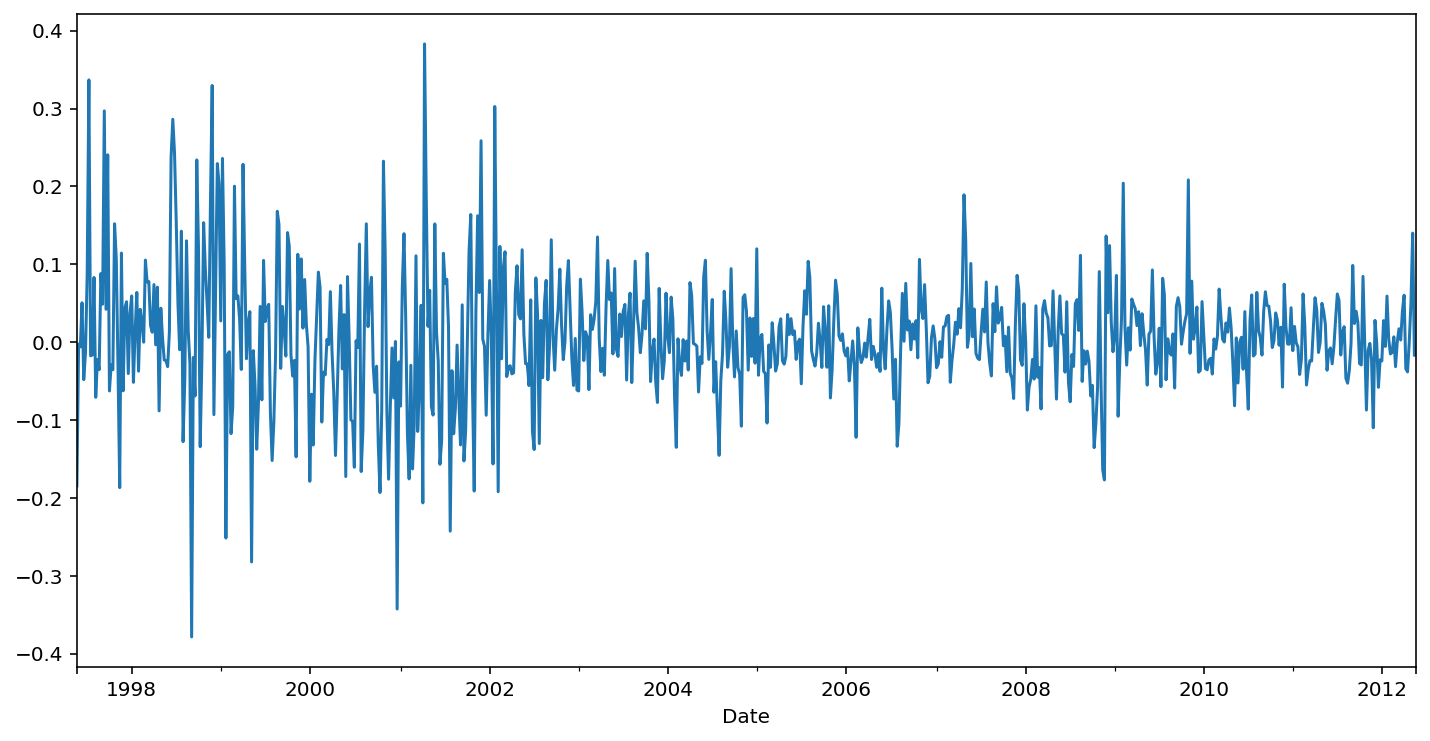

In [87]:
amazon_first_15_years_1997.weekly_returns.plot(figsize=(12,6))

In [88]:
udiff = amazon_first_15_years_1997.drop(['Adj Close'],axis=1) 
udiff.head()

,weekly_returns
Date,
1997-05-25,-0.184358
1997-06-01,-0.002210
1997-06-08,-0.005975
1997-06-15,0.050745
1997-06-22,-0.048009


In [89]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [90]:
rolmean = udiff.rolling(20).mean()
rolstd = udiff.rolling(20).std()

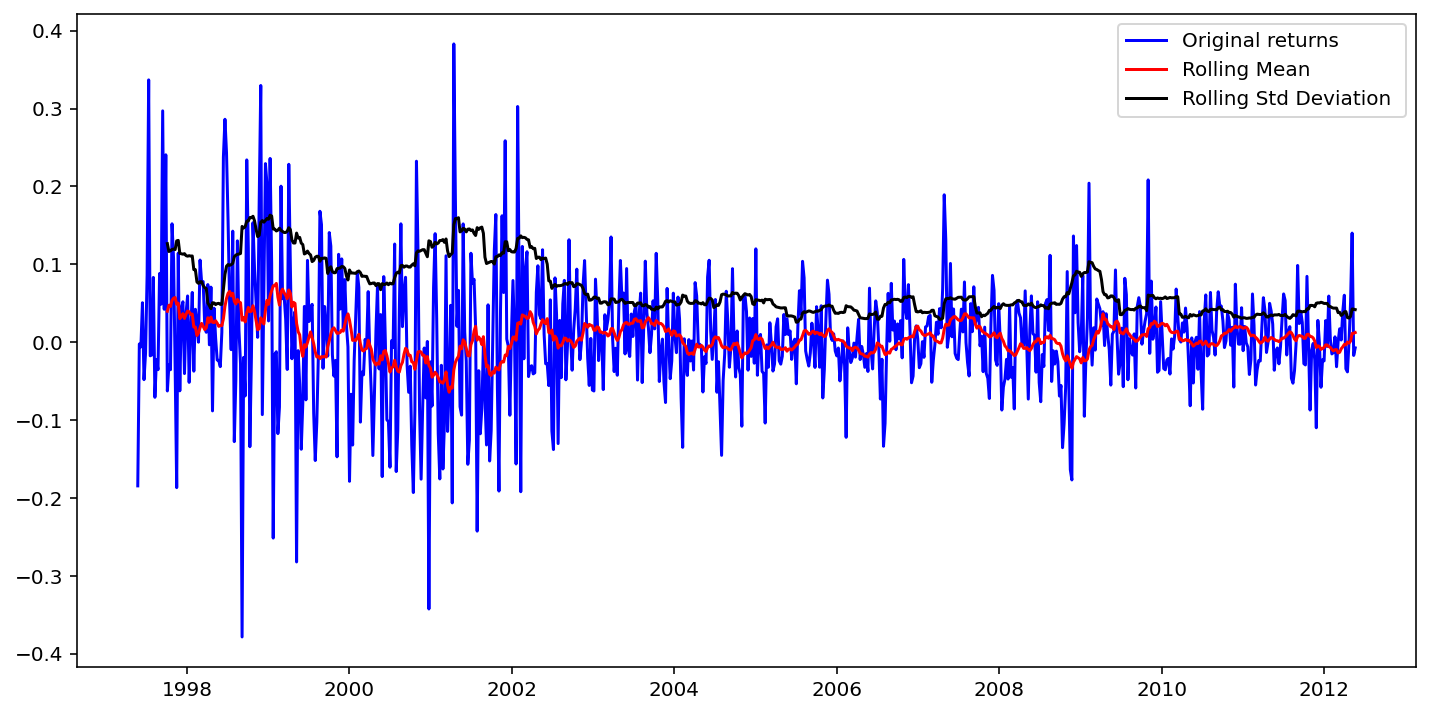

In [91]:
plt.figure(figsize=(12,6))
plt.plot(udiff,color='blue',label='Original returns')
plt.plot(rolmean,color='red',label='Rolling Mean')
plt.plot(rolstd,color='black',label='Rolling Std Deviation ')
plt.legend(loc='best')
plt.show()

In [92]:
dftest = sm.tsa.adfuller(udiff.weekly_returns,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stats','p-value','No of Lags','No of Observation '])
dfoutput

Test Stats           -6.737048e+00
p-value               3.187946e-09
No of Lags            1.600000e+01
No of Observation     7.660000e+02
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

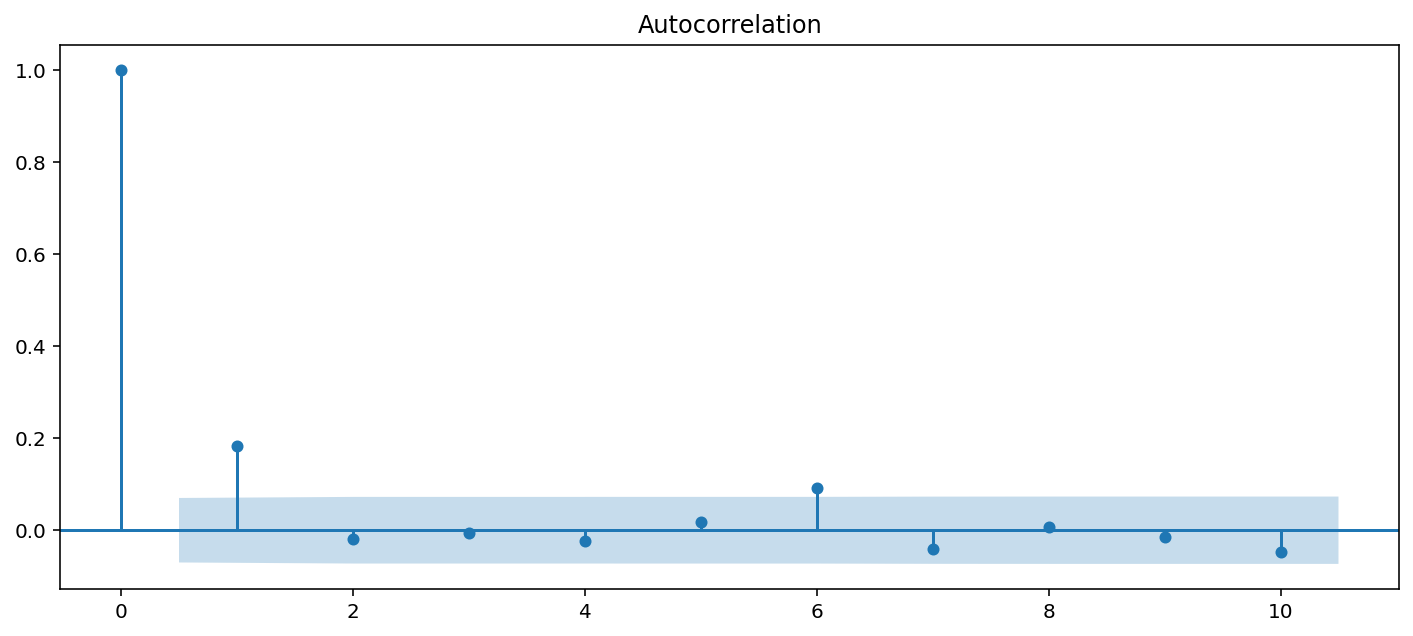

In [93]:
from statsmodels.graphics.tsaplots import plot_acf
fig,ax = plt.subplots(figsize=(12,5))
plot_acf(udiff.values,lags=10,ax=ax)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

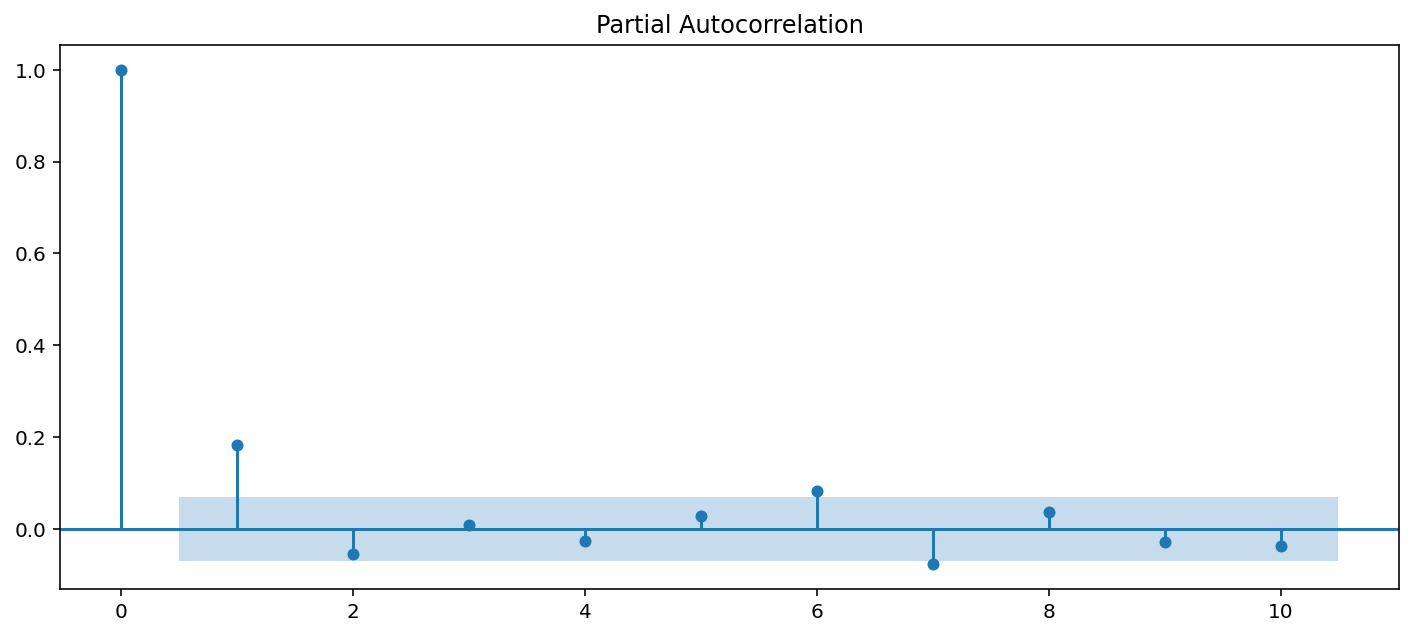

In [94]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax = plt.subplots(figsize=(12,5))
plot_pacf(udiff.values,lags=10,ax=ax)
plt.show

In [95]:
from statsmodels.tsa.arima_model import ARMA
ar1 =ARMA(tuple(udiff.values),(7,1)).fit()
ar1.summary()

d:\PROGRAMMING\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  783
Model:                     ARMA(7, 1)   Log Likelihood                 898.956
Method:                       css-mle   S.D. of innovations              0.077
Date:                Sat, 03 Jun 2023   AIC                          -1777.911
Time:                        20:34:26   BIC                          -1731.280
Sample:                             0   HQIC                         -1759.979
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.003      1.827      0.068      -0.000       0.013
ar.L1.y       -0.1067      0.250     -0.427      0.669      -0.596       0.383
ar.L2.y        0.0057      0.060      0.095      0.924      -0.111       0.122
ar.L3.y       -0.0058      0.038     -0.151      0.880      -0.081       0.069
ar.L4.y       -0.0210      0.036     -0.583      0.560      -0.091       0.050
ar.L5.y        0.0006      0.036      0.017      0.986      -0.071       0.072
ar.L6.y        0.1029      0.036      2.871      0.004       0.033       0.173
ar.L7.y       -0.0538      0.045     -1.197      0.231      -0.142       0.034
ma.L1.y        0.3088      0.248      1.244      0.213      -0.178       0.795
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3158           -0.0000j            1.3158           -0.5000
AR.2           -0.7778           -1.0890j            1.3383           -0.3487
AR.3           -0.7778           +1.0890j            1.3383            0.3487
AR.4            0.5554           -1.3624j            1.4713           -0.1884
AR.5            0.5554           +1.3624j            1.4713            0.1884
AR.6            1.8361           -0.5190j            1.9081           -0.0438
AR.7            1.8361           +0.5190j            1.9081            0.0438
MA.1           -3.2385           +0.0000j            3.2385            0.5000
-----------------------------------------------------------------------------
"""

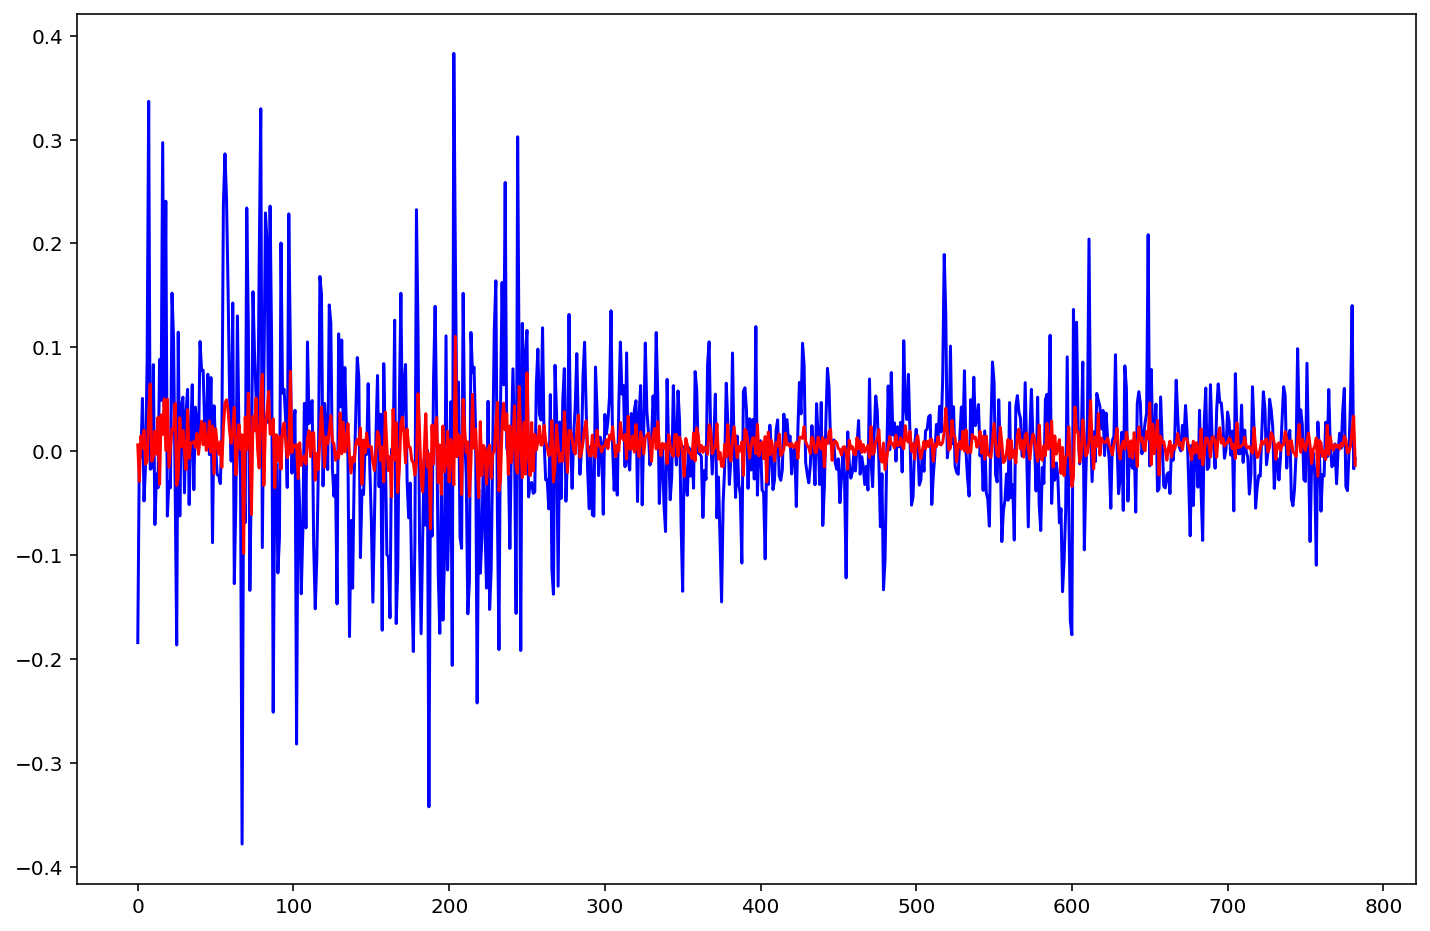

In [96]:
plt.figure(figsize=(12,8))
plt.plot(udiff.values,color='blue')
preds=ar1.fittedvalues
plt.plot(preds,color='red')
plt.show()

In [97]:
steps=2
forecast = ar1.forecast(steps=steps)[0]
forecast

array([0.00522279, 0.00520417])

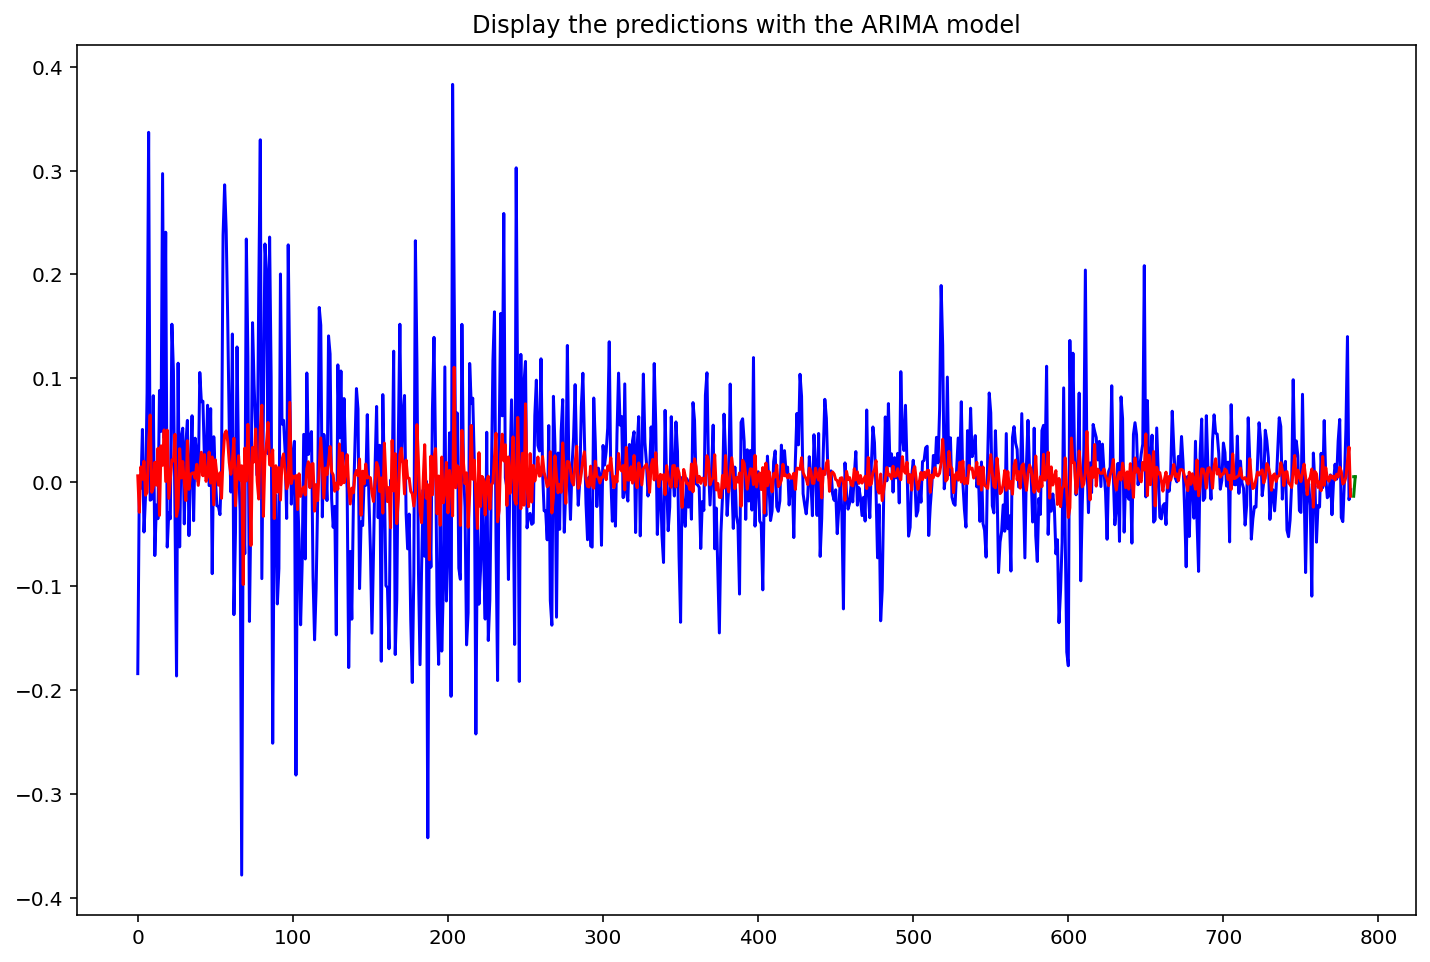

In [98]:

plt.figure(figsize=(12, 8))
plt.plot(udiff.values, color='blue')

preds = ar1.fittedvalues
plt.plot(preds, color='red')

plt.plot(pd.DataFrame(np.array([preds[-1],forecast[0]]).T,index=range(len(udiff.values)+1, len(udiff.values)+3)), color='green')
plt.plot(pd.DataFrame(forecast,index=range(len(udiff.values)+1, len(udiff.values)+1+steps)), color='green')
plt.title('Display the predictions with the ARIMA model')
plt.show()

In [99]:
start_date_first_set = pd.to_datetime('2013-05-15')
end_date_first_set = pd.to_datetime('2022-03-24')


amazon_last_10_years_1997 = df[(df['Date'] >= start_date_first_set) & (df['Date'] <= end_date_first_set)]

amazon_last_10_years_1997.set_index('Date', inplace=True)
amazon_last_10_years_1997

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-05-15,267.070007,269.049988,264.559998,266.559998,266.559998,2720500
2013-05-16,265.959991,268.429993,263.850006,264.119995,264.119995,1643500
2013-05-17,265.829987,269.980011,265.000000,269.899994,269.899994,2527300
2013-05-20,269.000000,271.790009,266.500000,267.630005,267.630005,2209000
2013-05-21,268.739990,270.769989,267.660004,268.859985,268.859985,1741200
...,...,...,...,...,...,...
2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300


In [100]:
amazon_last_10_years_1997 = amazon_last_10_years_1997.resample('w').mean()
amazon_last_10_years_1997= amazon_last_10_years_1997[['Adj Close']]
amazon_last_10_years_1997.head()


,Adj Close
Date,
2013-05-19,266.859996
2013-05-26,264.597992
2013-06-02,267.212502
2013-06-09,268.890002
2013-06-16,275.460004


In [101]:
amazon_last_10_years_1997['weekly_returns'] = np.log(amazon_last_10_years_1997['Adj Close']).diff()
amazon_last_10_years_1997

,Adj Close,weekly_returns
Date,,
2013-05-19,266.859996,NaN
2013-05-26,264.597992,-0.008512
2013-06-02,267.212502,0.009833
2013-06-09,268.890002,0.006258
2013-06-16,275.460004,0.024140
...,...,...
2022-02-27,3000.854981,-0.035123
2022-03-06,3001.188037,0.000111
2022-03-13,2820.354053,-0.062146


In [102]:
amazon_last_10_years_1997.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

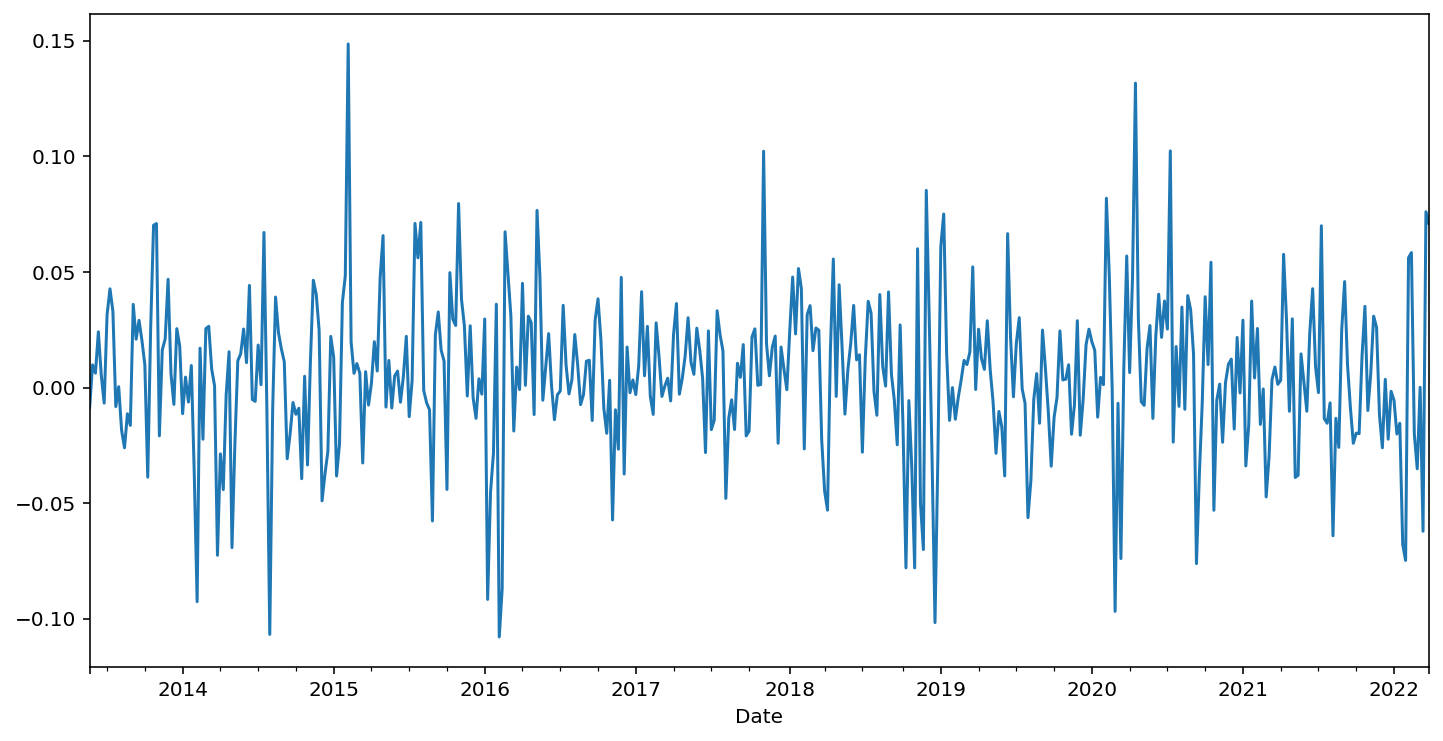

In [103]:
amazon_last_10_years_1997.weekly_returns.plot(figsize=(12,6))

In [104]:
udiff = amazon_last_10_years_1997.drop(['Adj Close'],axis=1) 
udiff.head()

,weekly_returns
Date,
2013-05-26,-0.008512
2013-06-02,0.009833
2013-06-09,0.006258
2013-06-16,0.024140
2013-06-23,0.005416


In [105]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [106]:
rolmean = udiff.rolling(20).mean()
rolstd = udiff.rolling(20).std()

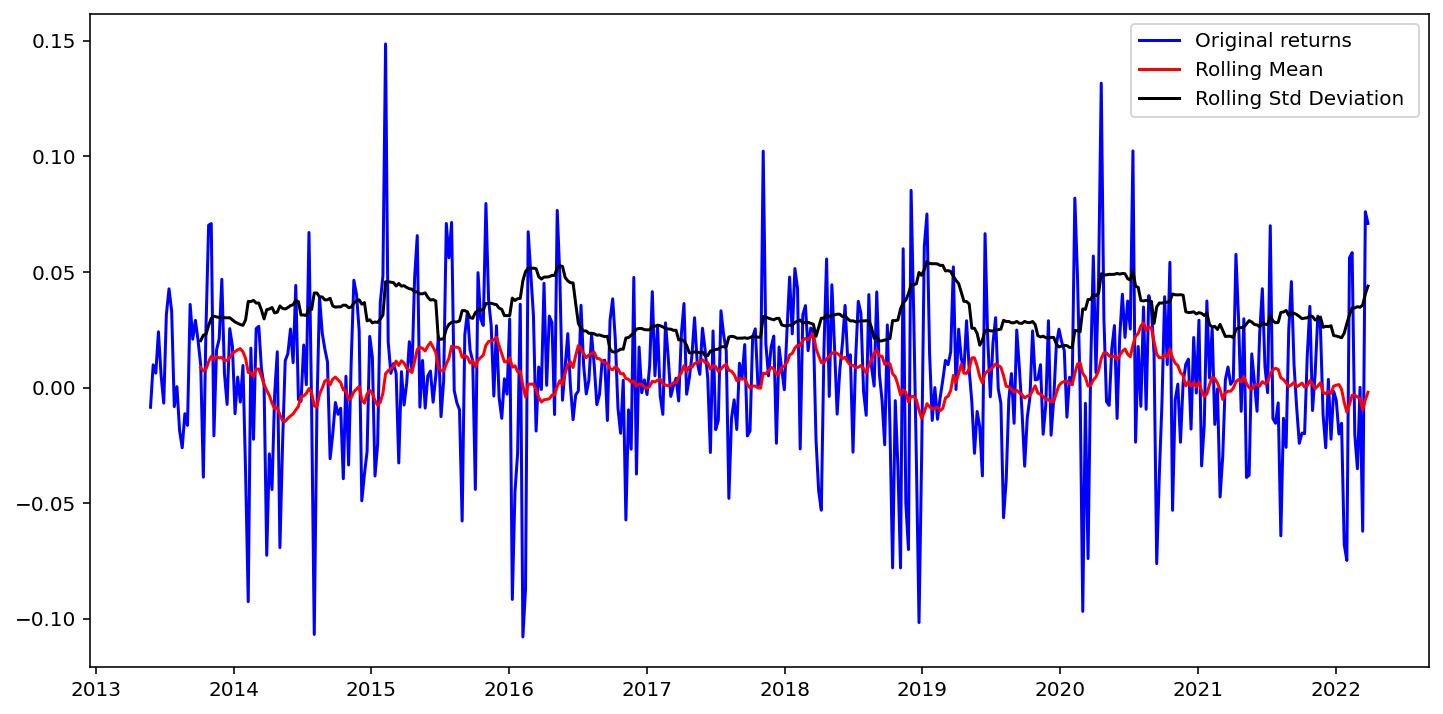

In [107]:
plt.figure(figsize=(12,6))
plt.plot(udiff,color='blue',label='Original returns')
plt.plot(rolmean,color='red',label='Rolling Mean')
plt.plot(rolstd,color='black',label='Rolling Std Deviation ')
plt.legend(loc='best')
plt.show()

In [108]:
dftest = sm.tsa.adfuller(udiff.weekly_returns,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stats','p-value','No of Lags','No of Observation '])
dfoutput

Test Stats           -1.489970e+01
p-value               1.513532e-27
No of Lags            1.000000e+00
No of Observation     4.600000e+02
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

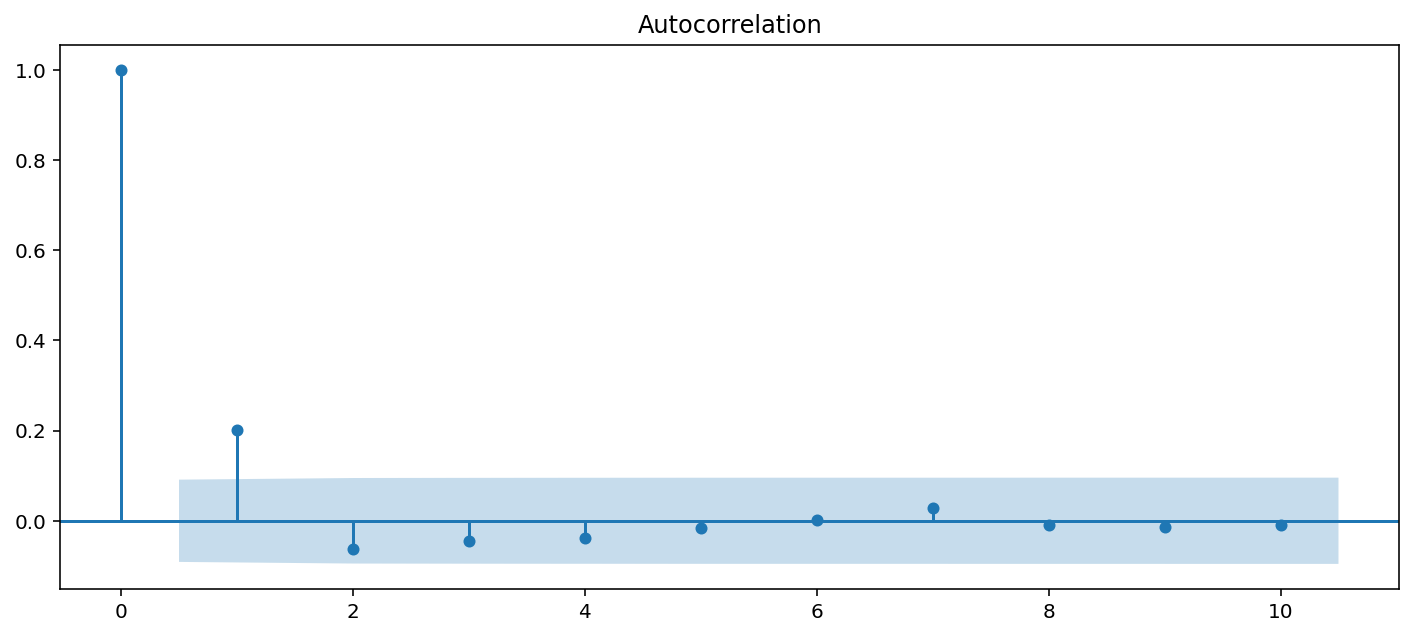

In [109]:
from statsmodels.graphics.tsaplots import plot_acf
fig,ax = plt.subplots(figsize=(12,5))
plot_acf(udiff.values,lags=10,ax=ax)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

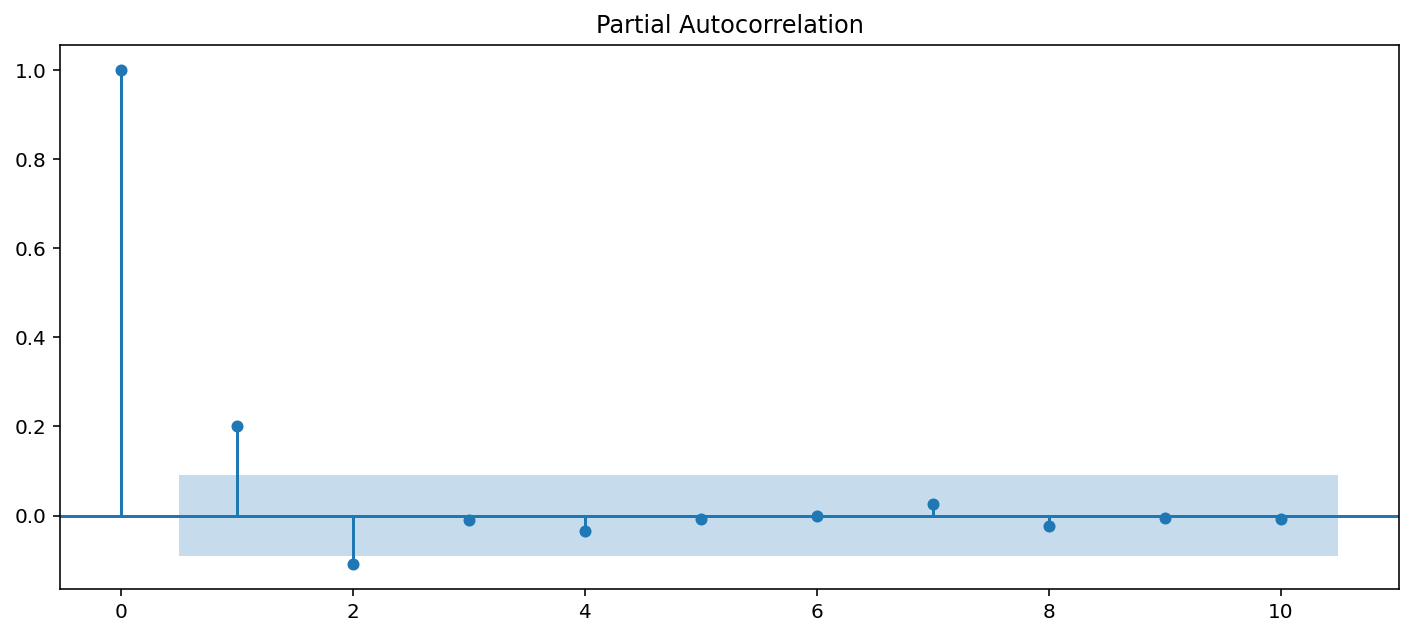

In [110]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax = plt.subplots(figsize=(12,5))
plot_pacf(udiff.values,lags=10,ax=ax)
plt.show

In [111]:
from statsmodels.tsa.arima_model import ARMA
ar1 =ARMA(tuple(udiff.values),(2,1)).fit()
ar1.summary()

d:\PROGRAMMING\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  462
Model:                     ARMA(2, 1)   Log Likelihood                 927.241
Method:                       css-mle   S.D. of innovations              0.033
Date:                Sat, 03 Jun 2023   AIC                          -1844.481
Time:                        20:34:31   BIC                          -1823.804
Sample:                             0   HQIC                         -1836.340
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.002      3.265      0.001       0.002       0.009
ar.L1.y        0.4657      0.537      0.868      0.386      -0.586       1.518
ar.L2.y       -0.1548      0.105     -1.481      0.139      -0.360       0.050
ma.L1.y       -0.2449      0.544     -0.451      0.652      -1.310       0.820
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5044           -2.0489j            2.5419           -0.1492
AR.2            1.5044           +2.0489j            2.5419            0.1492
MA.1            4.0825           +0.0000j            4.0825            0.0000
-----------------------------------------------------------------------------
"""

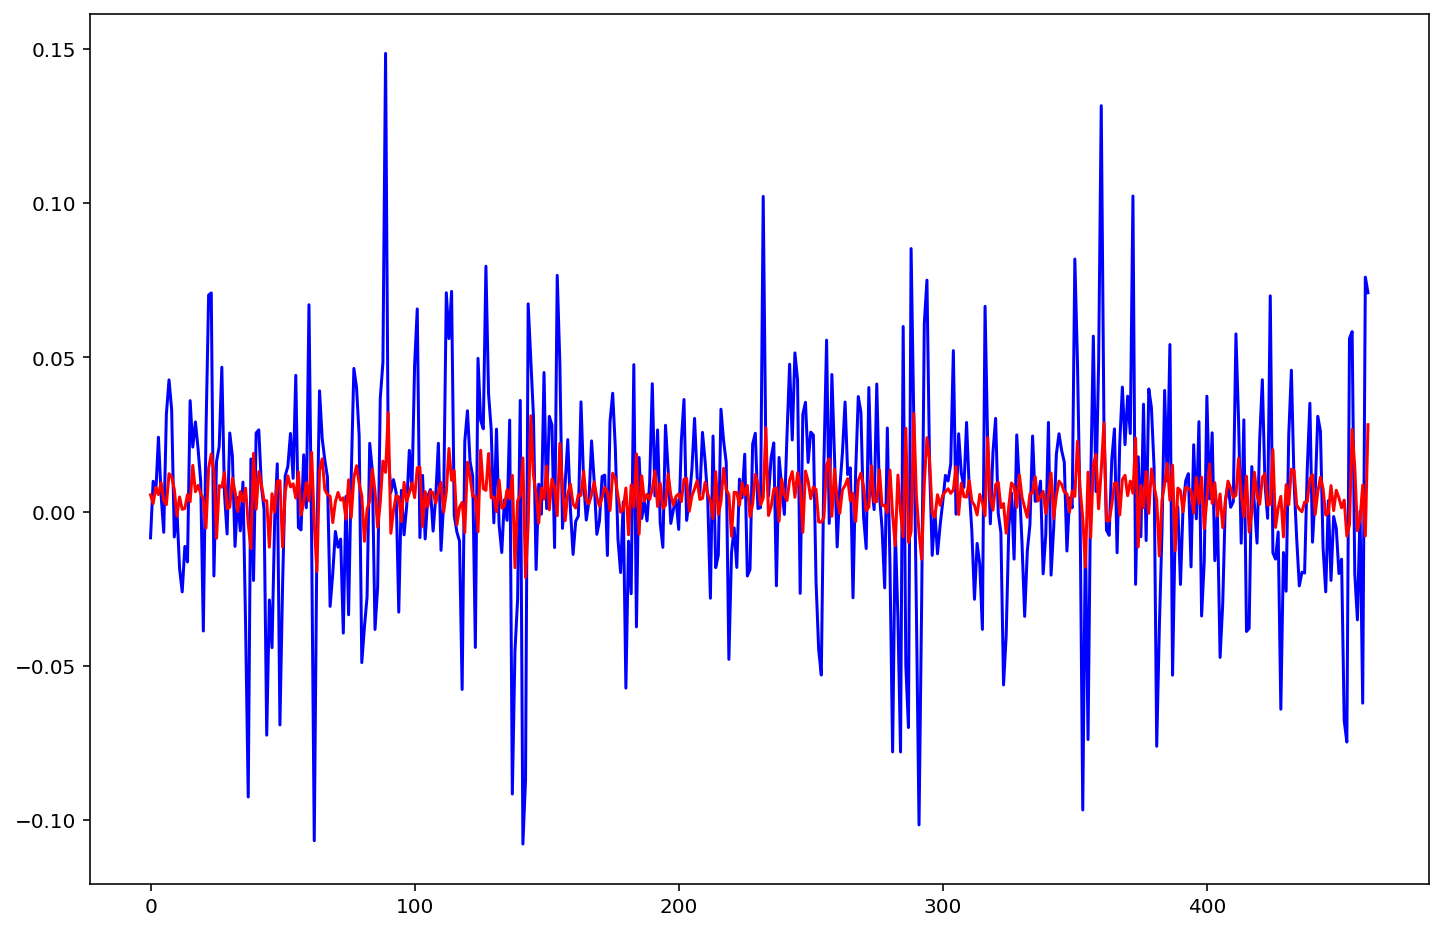

In [112]:
plt.figure(figsize=(12,8))
plt.plot(udiff.values,color='blue')
preds=ar1.fittedvalues
plt.plot(preds,color='red')
plt.show()

In [113]:
steps=2
forecast = ar1.forecast(steps=steps)[0]
forecast

array([ 0.01454025, -0.00048737])

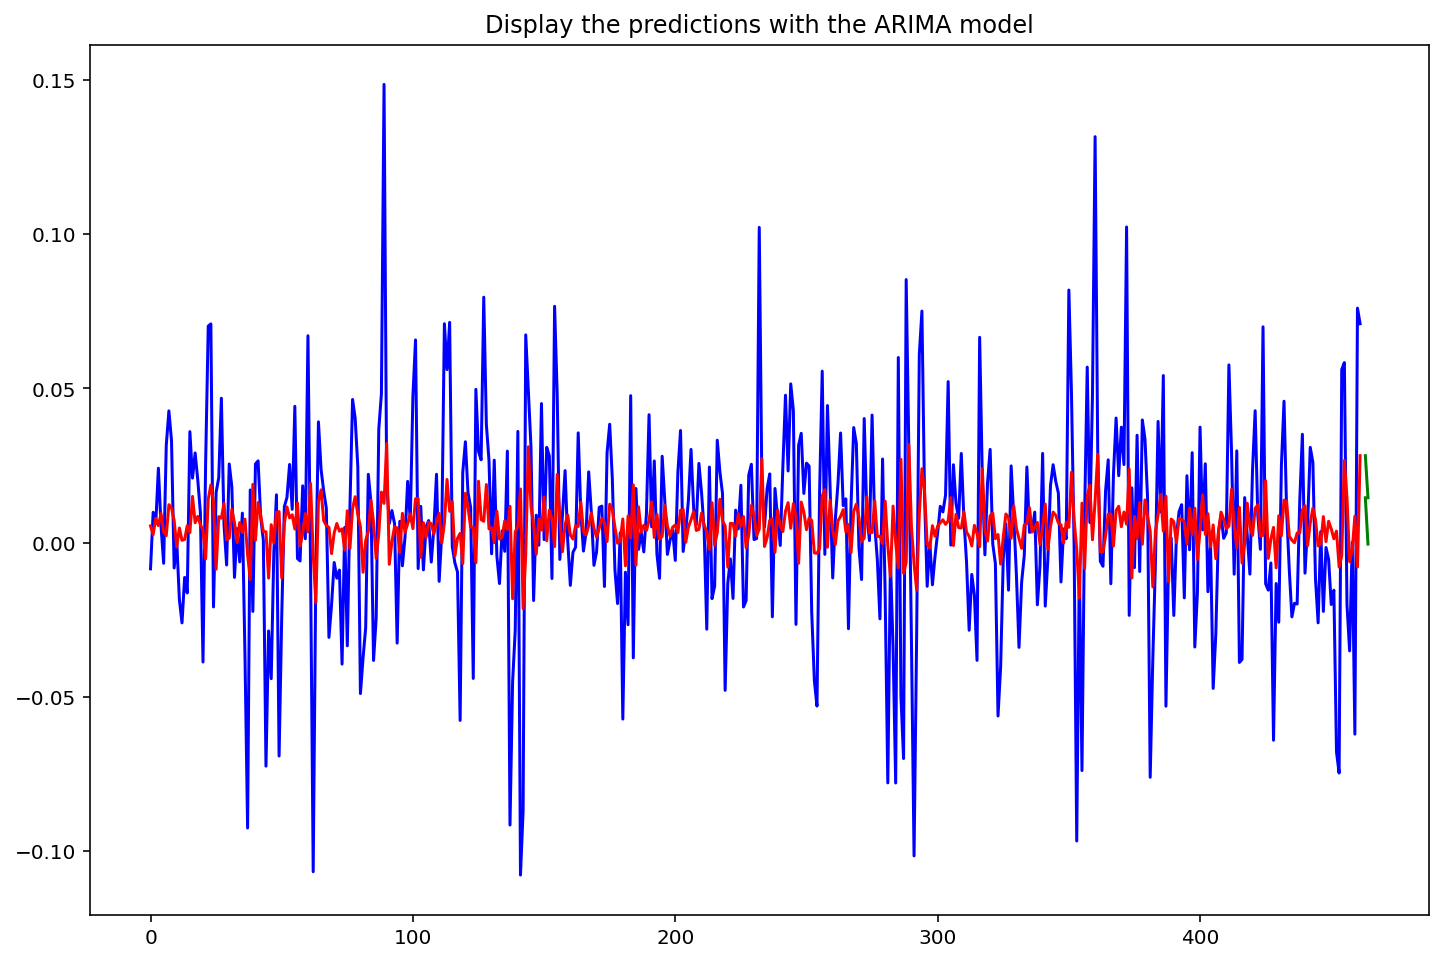

In [114]:
plt.figure(figsize=(12, 8))
plt.plot(udiff.values, color='blue')

preds = ar1.fittedvalues
plt.plot(preds, color='red')

plt.plot(pd.DataFrame(np.array([preds[-1],forecast[0]]).T,index=range(len(udiff.values)+1, len(udiff.values)+3)), color='green')
plt.plot(pd.DataFrame(forecast,index=range(len(udiff.values)+1, len(udiff.values)+1+steps)), color='green')
plt.title('Display the predictions with the ARIMA model')
plt.show()